In [172]:
# import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import joblib
import warnings

In [122]:
#import data
df_train = pd.read_csv('C:/MCI/test_MCI/data/churn-bigml-80.csv')
df_test = pd.read_csv('C:/MCI/test_MCI/data/churn-bigml-20.csv')


In [127]:
# data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

# Data preprocessing

In [ ]:
#Delete unnecessary columns including 'State', 'International plan', 'Voice mail plan columns'
df_train_drop = df_train.drop(['State','International plan','Voice mail plan'], axis=1)
df_test_drop = df_test.drop(['State','International plan','Voice mail plan'], axis=1)

In [97]:
#Separate the "Churn" column to make the label column
labels_train = df_train_drop.pop('Churn')
print(df_train_drop)
print(labels_train)
labels_test = df_test_drop.pop('Churn')
print(df_test_drop)
print(labels_test)

      Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
2661              79        415                      0              134.7   
2662             192        415                     36              156.2   
2663              68        415                      0              231.1   
2664              28        510                      0              180.8   
2665              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls

In [196]:
# Normalize the Churn column to a number
le = LabelEncoder()
labels_train = le.fit_transform(labels_train)
labels_test = le.fit_transform(labels_test)
print(labels_train)
print(labels_test)


[0 0 0 ... 0 0 0]
[0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 

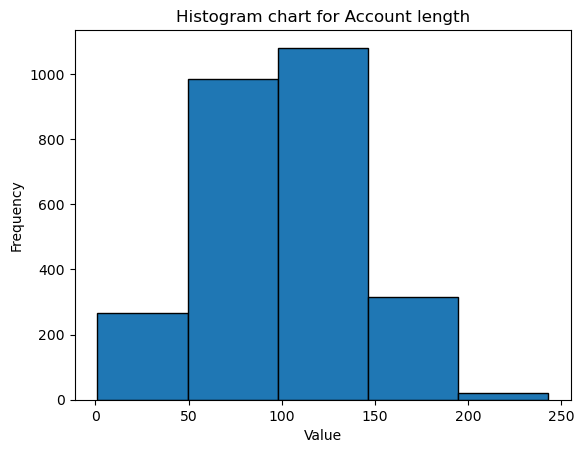

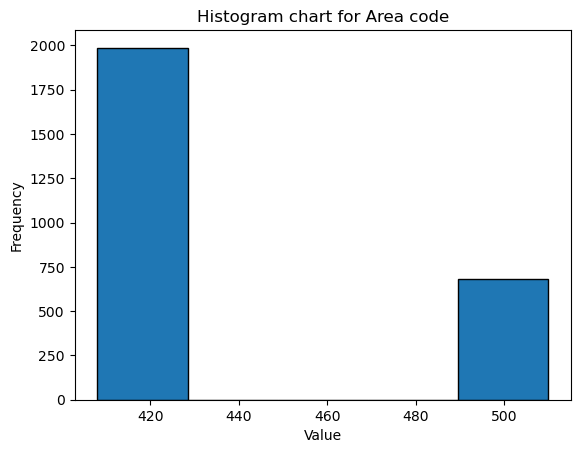

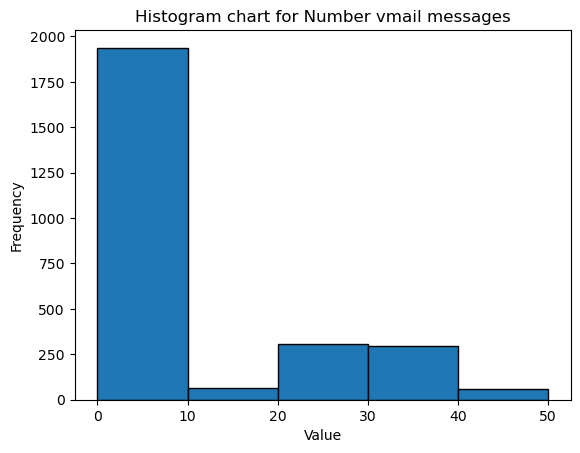

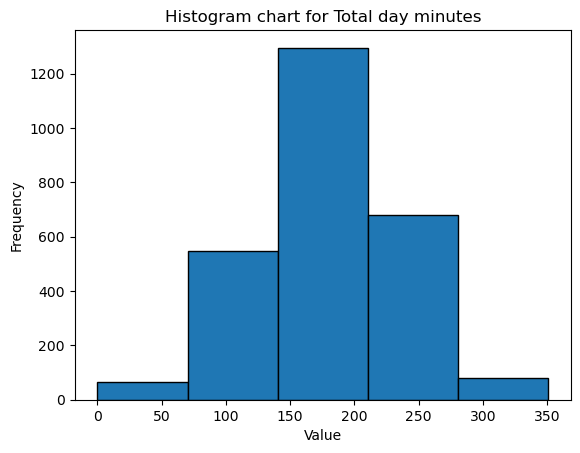

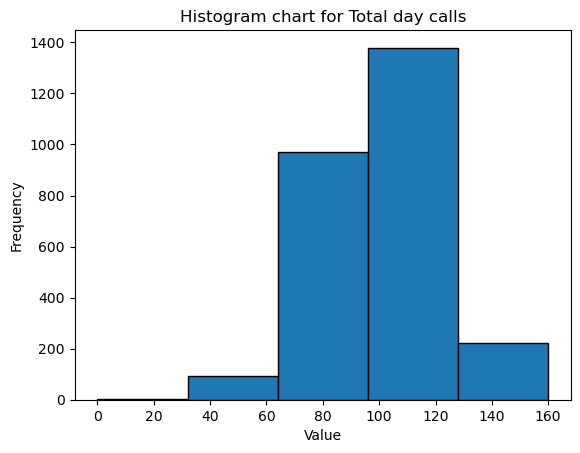

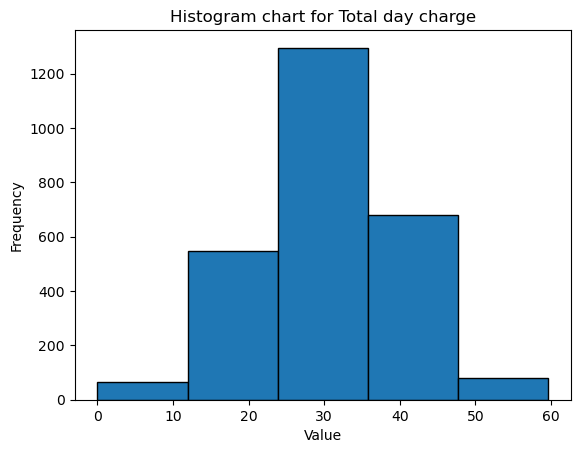

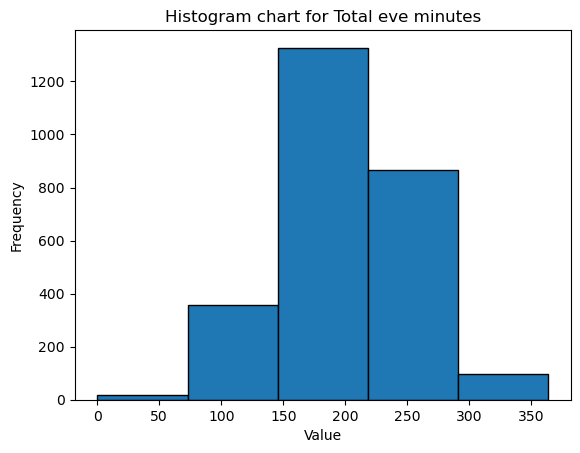

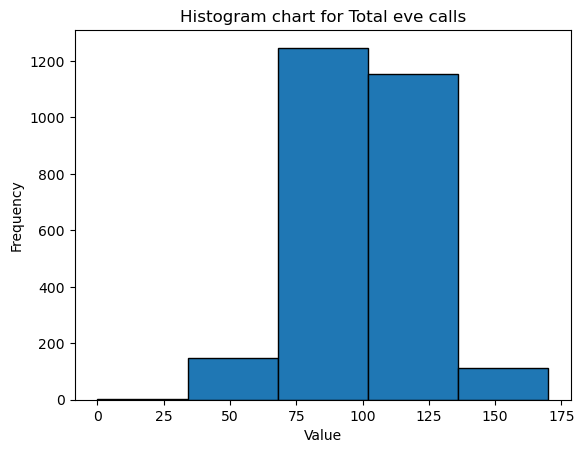

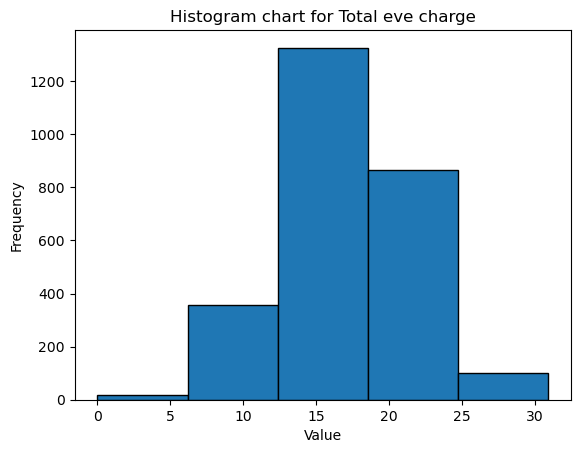

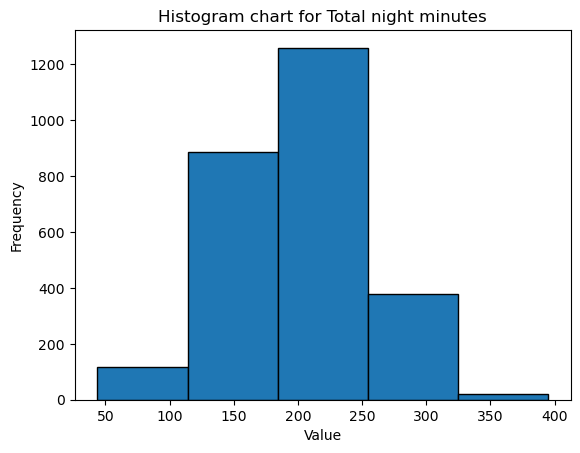

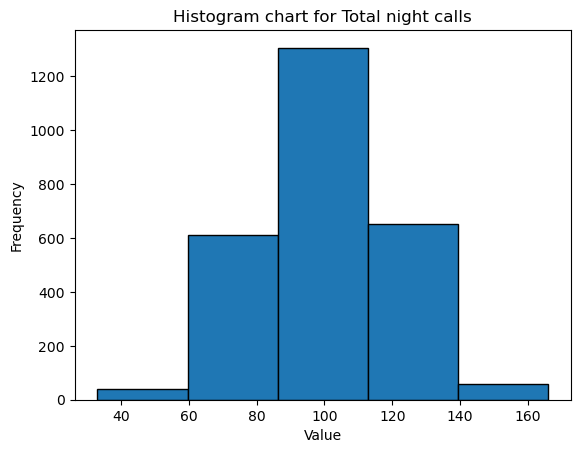

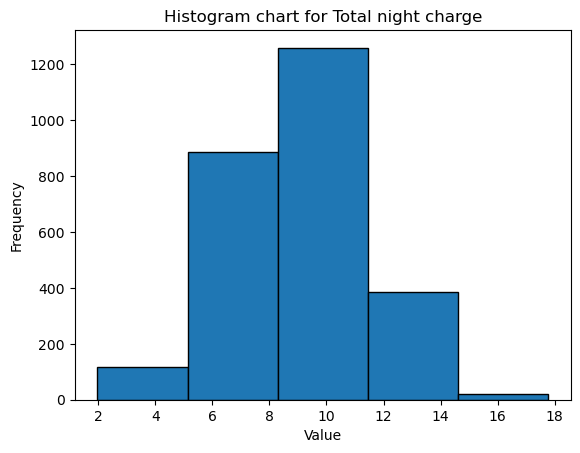

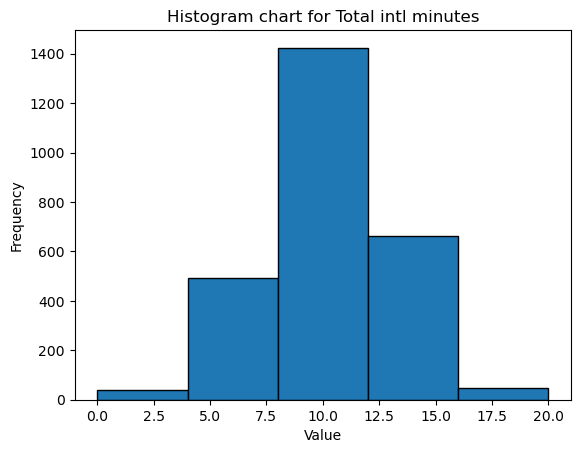

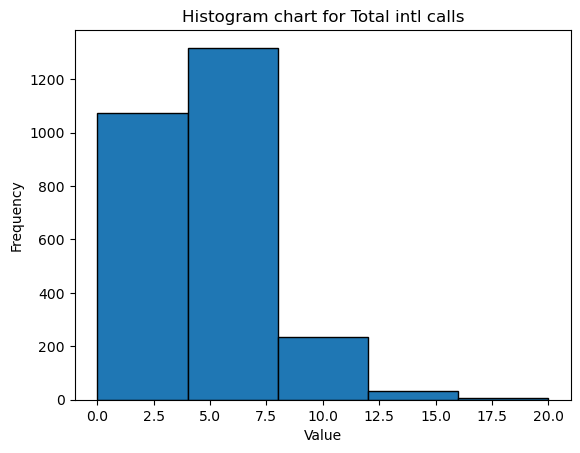

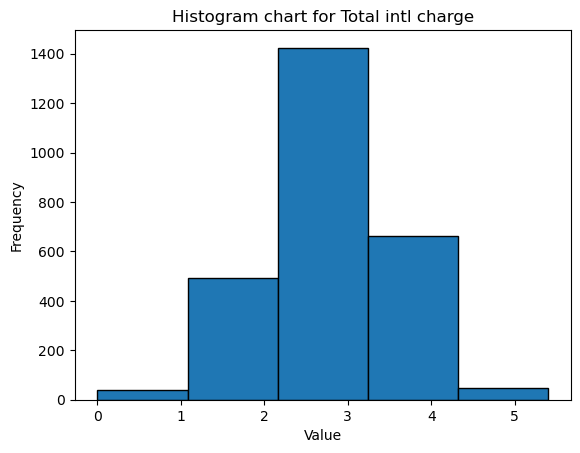

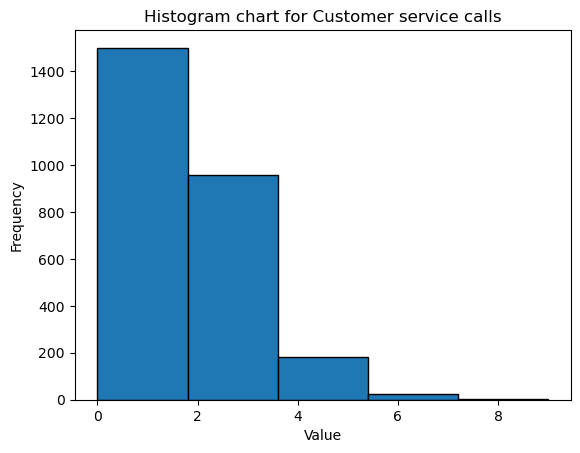

In [103]:
#Plot the columns in the train data set
import matplotlib.pyplot as plt
for column_name, column_data in df_train_drop.items():
    plt.hist(column_data, bins=5, edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram chart for {}'.format(column_name))
    plt.show()

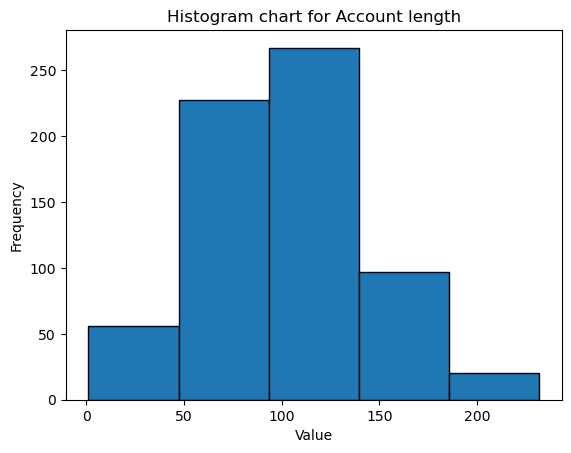

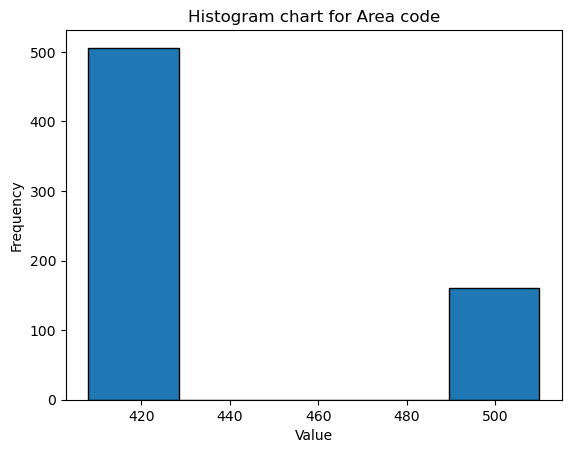

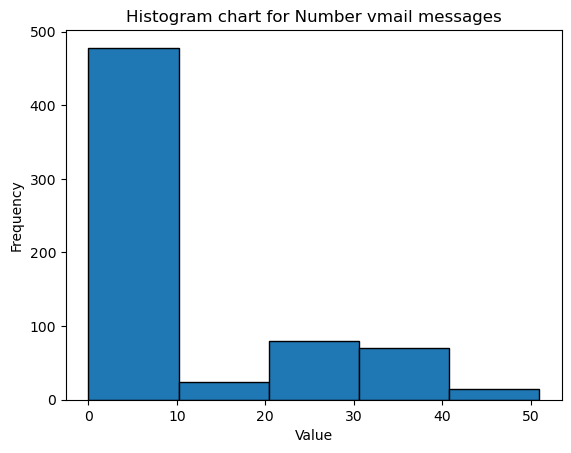

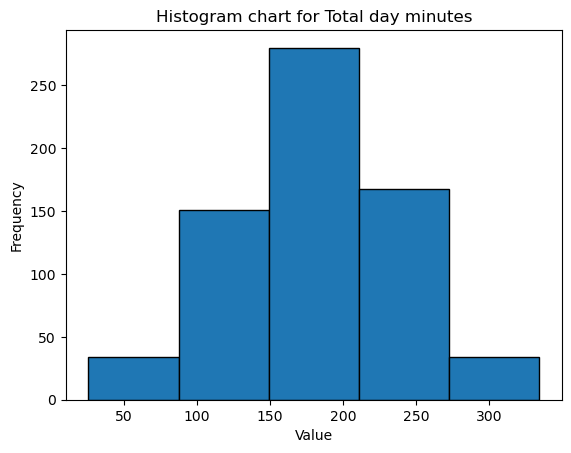

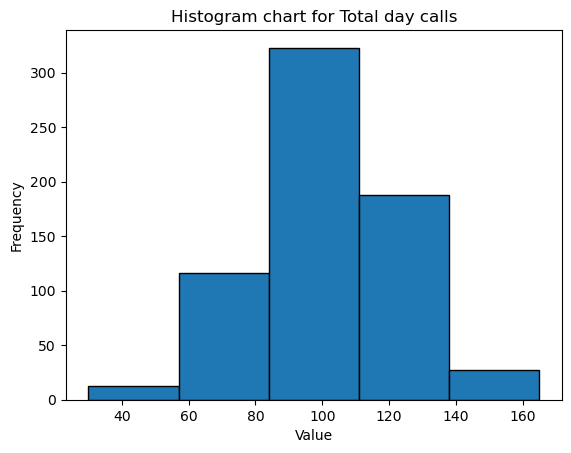

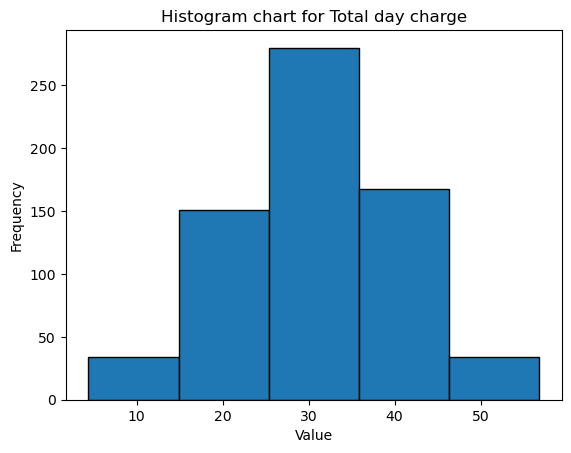

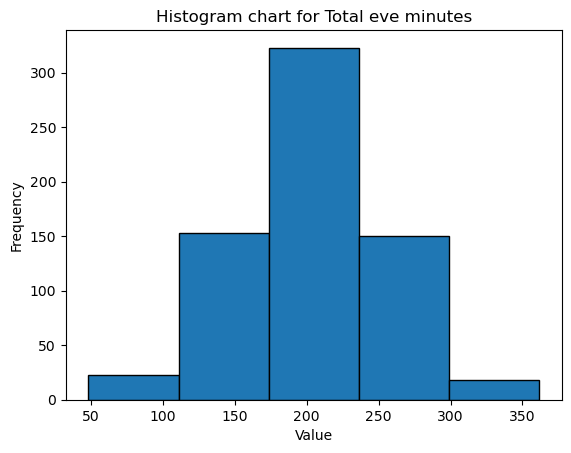

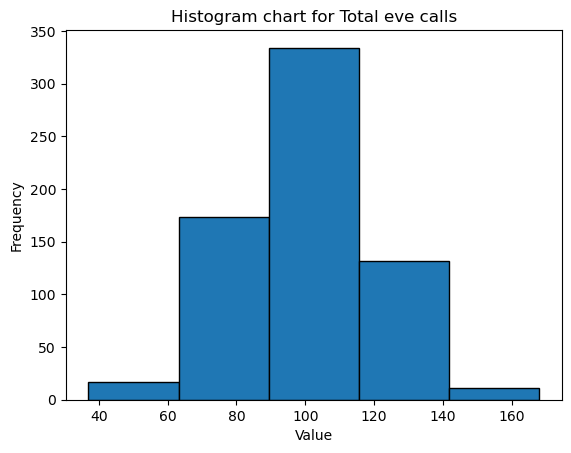

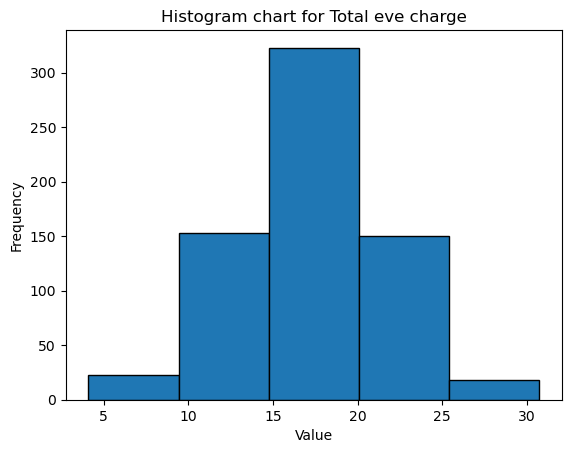

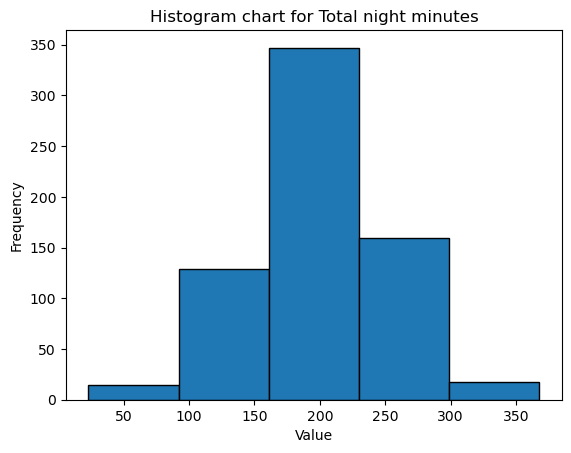

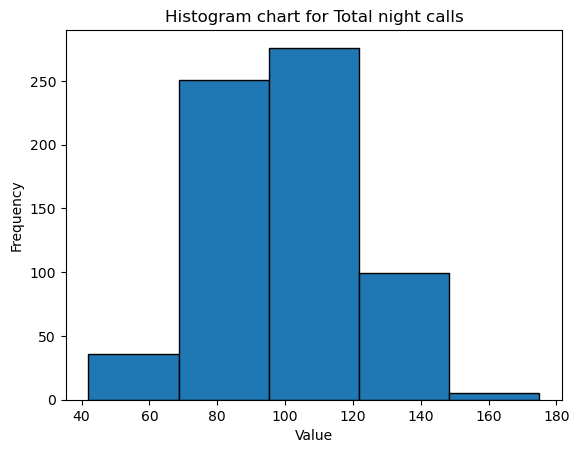

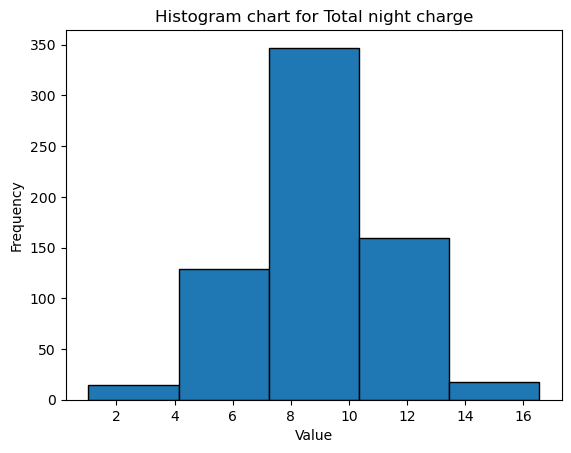

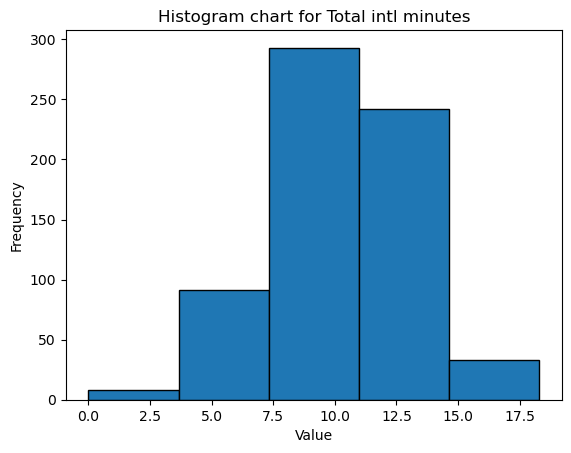

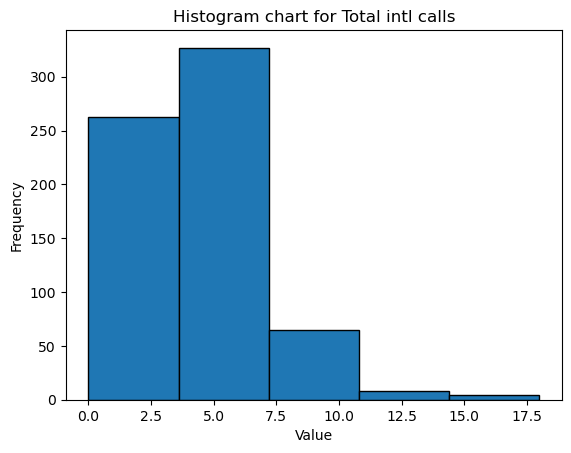

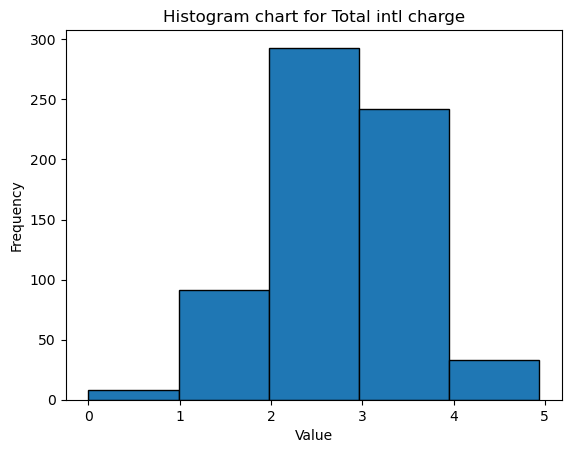

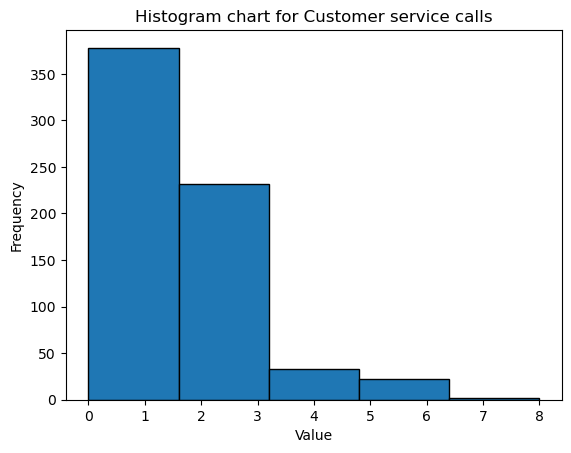

In [104]:
#Plot the columns in the test data set
import matplotlib.pyplot as plt
for column_name, column_data in df_test_drop.items():
    plt.hist(column_data, bins=5, edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram chart for {}'.format(column_name))
    plt.show()

In [102]:
# Since the data columns have a roughly bell-shaped histogram, we will use the StandardScaler() normalization method.
scaler = StandardScaler()
df_train_normal = pd.DataFrame(scaler.fit_transform(df_train_drop), columns=df_train_drop.columns)
df_test_normal = pd.DataFrame(scaler.fit_transform(df_test_drop), columns=df_test_drop.columns)
print(df_test_normal)
print(df_train_normal)

     Account length  Area code  Number vmail messages  Total day minutes  \
0          0.347127  -0.674397              -0.601245           0.064036   
1         -0.927731  -0.506741              -0.601245          -0.934756   
2          1.425853  -0.506741              -0.601245           2.739500   
3          0.200028  -0.506741              -0.601245          -1.271894   
4         -1.319994   1.768601              -0.601245          -1.111438   
..              ...        ...                    ...                ...   
662        0.273578  -0.506741               1.258025          -0.790526   
663        0.077446  -0.674397               1.472556          -1.755064   
664       -1.050313  -0.506741              -0.601245           0.233506   
665        1.376820  -0.506741              -0.601245          -0.200987   
666        1.989732   1.768601              -0.601245           0.592278   

     Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0        

# Build and train model


In [192]:
#data train and data test
X_train = df_train_normal
y_train = labels_train
X_test = df_test_normal
y_test = labels_test

### Logistic Regression model

In [193]:
# Created a Logistic Regression model
model_Re = LogisticRegression()

# Train model
model_Re.fit(X_train, y_train)

# Predict labels for test data
y_pred = model_Re.predict(X_test)

# Evaluate the model on test data
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
# Print
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
# transform y_pred to type data frame
y_pred = pd.DataFrame(y_pred)
print(y_pred)
# turn off warnings
warnings.filterwarnings("ignore")

Accuracy: 0.8575712143928036
Recall: 0.09473684210526316
F1-score: 0.15929203539823011
     0
0    0
1    0
2    1
3    0
4    0
..  ..
662  0
663  0
664  0
665  0
666  0

[667 rows x 1 columns]


### Random Forests model

In [194]:
# Creat a Random Forests model
model_Ra = RandomForestClassifier(n_estimators=100,
                                  max_depth=10,
                                  random_state=42)

# Train model
model_Ra.fit(X_train, y_train)

# Predict labels for test data
y_pred = model_Ra.predict(X_test)

# Evaluate the model on test data
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
# transform y_pred to type data frame
y_pred = pd.DataFrame(y_pred)
print(y_pred)

Accuracy: 0.9385307346326837
Recall: 0.6105263157894737
F1-score: 0.7388535031847133
     0
0    0
1    1
2    1
3    0
4    0
..  ..
662  0
663  0
664  0
665  0
666  0

[667 rows x 1 columns]


### Predict customers using Random Forests model

In [180]:
# Save the Random Forests model
model_filename = 'C:/MCI/test_MCI/model/mymodel.joblib'
joblib.dump(model_Ra, model_filename)

# Load model from file
loaded_model = joblib.load(model_filename)

In [191]:
# Prediction
Account_length = int(input('Account length: '))
Area_code = int(input('Area code: '))
Number_vmail_messages = int(input('Number vmail messages: '))
Tota_day_minutes = float(input('Total day minutes: '))
Total_day_calls = int(input('Total day callse: '))
Total_day_charge = float(input('Total day charge: '))
Total_eve_minutes = float(input('Total eve minutes: '))
Total_eve_calls = int(input('Total eve calls: '))
Total_eve_charge = float(input('Total eve charge: '))
Total_night_minutes = float(input('Total night minutes: '))
Total_night_calls = int(input('Total night calls: '))
Total_night_charge = float(input('Total night charge: '))
Total_intl_minutes = float(input('Total intl minutes: '))
Total_intl_calls = int(input('Total intl calls: '))
Total_intl_charge= float(input('Total intl charge: '))
Customer_service_calls = int(input('Customer service calls: '))

customer_data = [Account_length,
                      Area_code,
                      Number_vmail_messages,
                      Tota_day_minutes,
                      Total_day_calls,
                      Total_day_charge,
                      Total_eve_minutes,
                      Total_eve_calls,
                      Total_eve_charge,
                      Total_night_minutes,
                      Total_night_calls,
                      Total_night_charge,
                      Total_intl_minutes,
                      Total_intl_calls,
                      Total_intl_charge,
                      Customer_service_calls]


predicted_labels = loaded_model.predict([customer_data])

# Print prediction results (churn = 0 --> False, churn = 1 --> True)
print('-------------------------')
if predicted_labels[0] == 1:
    print("True")
else:
    print("False")

Account length: 111
Area code: 415
Number vmail messages: 0
Total day minutes: 110.4
Total day callse: 103
Total day charge: 18.77
Total eve minutes: 137.3
Total eve calls: 102
Total eve charge: 11.67
Total night minutes: 189.6
Total night calls: 105
Total night charge: 8.53
Total intl minutes: 7.7
Total intl calls: 6
Total intl charge: 2.08
Customer service calls: 2
-------------------------
True
